In [1]:
import experiment_framework as ef
import fast_model_improved as fmi
from pyexpat import model
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
G = nx.erdos_renyi_graph(2000, 0.005)
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 1886
Number of deinfluenced nodes: 0
Number of susceptible nodes: 114
influencer {643, 516, 1541, 1294, 1170, 1555, 404, 19, 1046, 789, 408, 535, 1429, 411, 924, 1062, 1447, 39, 40, 298, 552, 941, 1203, 564, 563, 565, 571, 1474, 1475, 581, 1095, 199, 206, 1615, 721, 850, 1236, 1112, 1881, 1370, 94, 1631, 741, 101, 1510, 359, 1642, 752, 764, 1791}


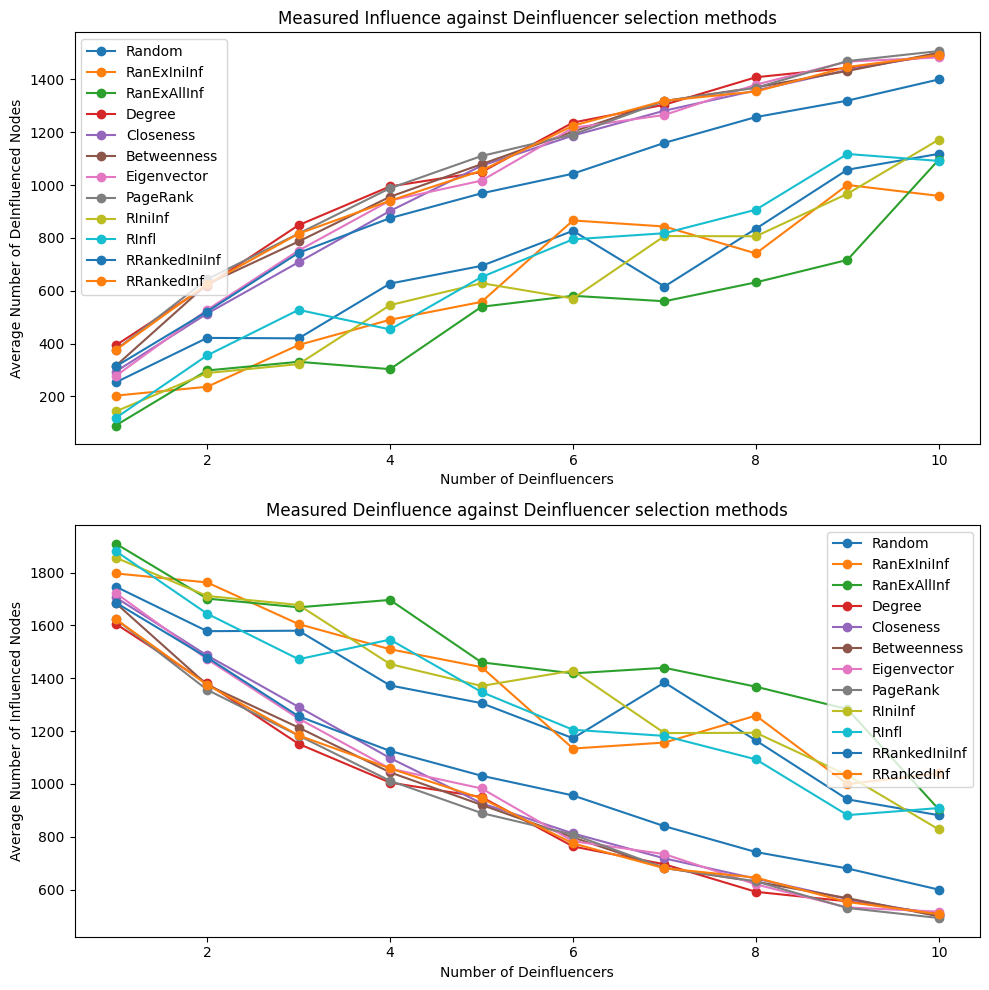

In [3]:
# Run simulation for different values of k
k_deinfluencers_ls = [1,2,3,4,5,6,7,8,9,10]  # Different values of k to test
deinfluencers_list = ef.select_deinfluencers(k_deinfluencers_ls, model_fixed_influencers)
results = ef.average_results(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

# Plotting results
fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].set_title('Measured Influence against Deinfluencer selection methods')
axs[1].set_title('Measured Deinfluence against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting

for method in methods:
    influenced_nodes = [results[k][method][0] for k in k_values]
    total_steps = [results[k][method][1] for k in k_values]

    axs[0].plot(k_values, influenced_nodes, label=method, marker='o')
    axs[1].plot(k_values, total_steps, label=method, marker='o')

axs[0].legend()
axs[0].set_xlabel('Number of Deinfluencers')
axs[0].set_ylabel('Average Number of DeInfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Number of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

plt.tight_layout()
plt.show()
